<a href="https://colab.research.google.com/github/bluepsm/credit-card-fraud-detection/blob/main/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Credit Card Fraud Detection

**Objective:** Detect fraudulent transactions from credit card data.

**Skills:** Anomaly detection, dealing with imbalanced datasets, advanced
classification techniques (e.g., random forests, gradient boosting), evaluation metrics for imbalanced data.

In [217]:
#@title Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

In [218]:
#@title Import dataset
dataset = pd.read_csv('/content/drive/MyDrive/datasets/credit_card/creditcard.csv')

normal_dataset = dataset[dataset['Class'] == 0].copy()
fraud_dataset = dataset[dataset['Class'] == 1].copy()

normal_extact = normal_dataset.sample(n=492)
test_dataset = pd.concat([normal_extact, fraud_dataset])
normal_dataset = normal_dataset.drop(normal_extact.index)

x_train = normal_dataset[normal_dataset.columns[~normal_dataset.columns.isin(['Class'])]].copy()
y_train = normal_dataset['Class'].copy()
x_test = test_dataset[test_dataset.columns[~test_dataset.columns.isin(['Class'])]].copy()
y_test = test_dataset['Class'].copy()

In [219]:
#@title Data overview
print(dataset.info())
print(dataset.describe())
print(dataset['Class'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [220]:
#@title Correlation
dataset.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.00,0.12,-0.01,-0.42,-0.11,0.17,-0.06,0.08,-0.04,-0.01,0.03,-0.25,0.12,-0.07,-0.10,-0.18,0.01,-0.07,0.09,0.03,-0.05,0.04,0.14,0.05,-0.02,-0.23,-0.04,-0.01,-0.01,-0.01,-0.01
V1,0.12,1.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.23,-0.10
V2,-0.01,0.00,1.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.53,0.09
V3,-0.42,-0.00,0.00,1.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.21,-0.19
V4,-0.11,-0.00,-0.00,0.00,1.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.10,0.13
V5,0.17,0.00,0.00,-0.00,-0.00,1.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.39,-0.09
V6,-0.06,-0.00,0.00,0.00,-0.00,0.00,1.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.22,-0.04
V7,0.08,-0.00,0.00,0.00,-0.00,0.00,0.00,1.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.40,-0.19
V8,-0.04,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,1.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.10,0.02
V9,-0.01,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.04,-0.10


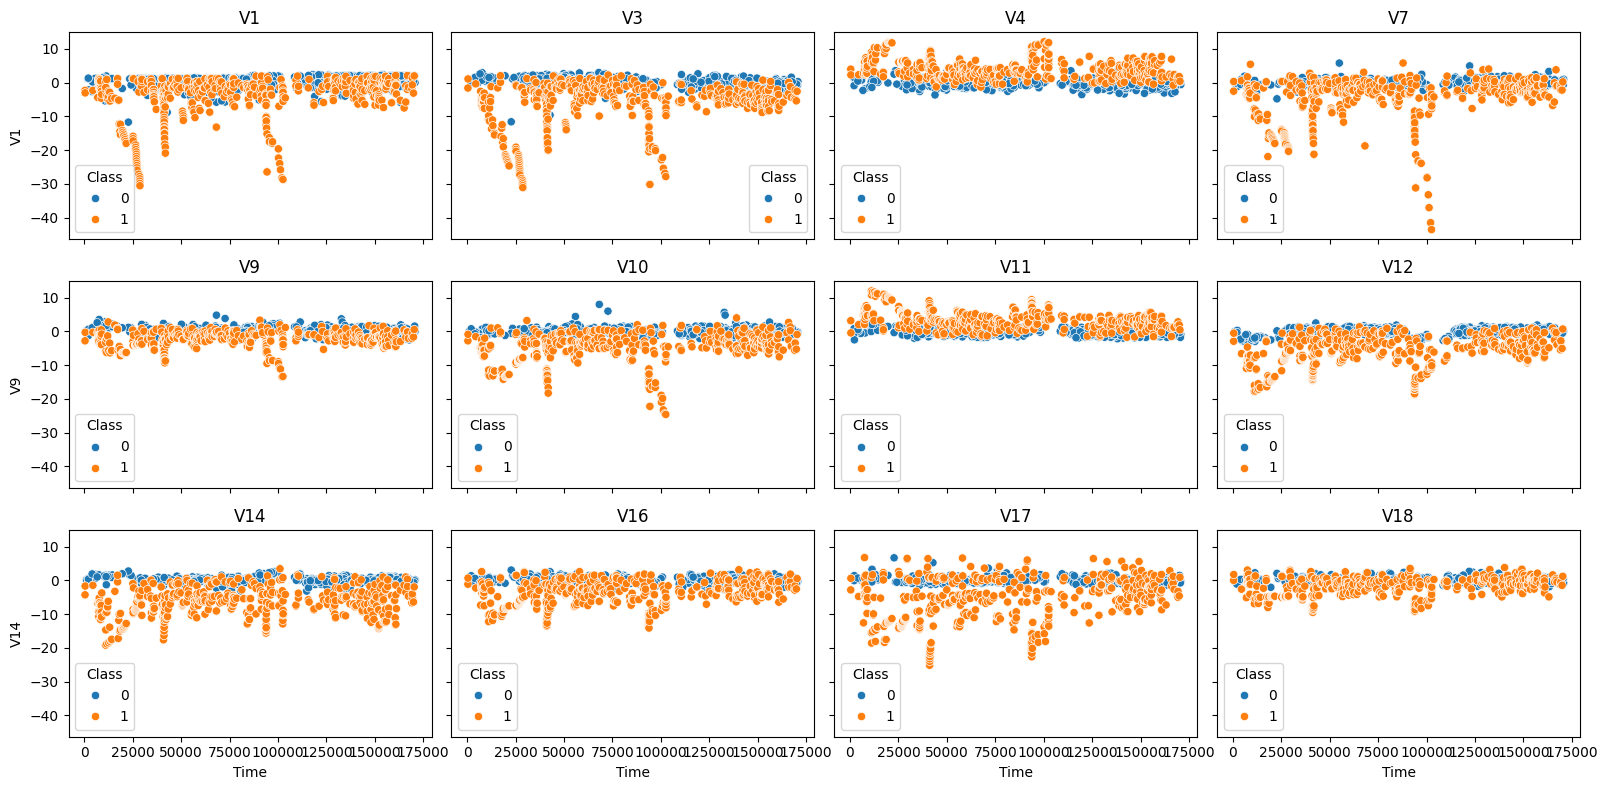

In [221]:
#@title Plot scatter
fig_1, axes_1 = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(16, 8))
axes_1 = axes_1.flatten()
sns.scatterplot(x='Time', y='V1', hue='Class', data=test_dataset, ax=axes_1[0])
axes_1[0].set_title('V1')
sns.scatterplot(x='Time', y='V3', hue='Class', data=test_dataset, ax=axes_1[1])
axes_1[1].set_title('V3')
sns.scatterplot(x='Time', y='V4', hue='Class', data=test_dataset, ax=axes_1[2])
axes_1[2].set_title('V4')
sns.scatterplot(x='Time', y='V7', hue='Class', data=test_dataset, ax=axes_1[3])
axes_1[3].set_title('V7')
sns.scatterplot(x='Time', y='V9', hue='Class', data=test_dataset, ax=axes_1[4])
axes_1[4].set_title('V9')
sns.scatterplot(x='Time', y='V10', hue='Class', data=test_dataset, ax=axes_1[5])
axes_1[5].set_title('V10')
sns.scatterplot(x='Time', y='V11', hue='Class', data=test_dataset, ax=axes_1[6])
axes_1[6].set_title('V11')
sns.scatterplot(x='Time', y='V12', hue='Class', data=test_dataset, ax=axes_1[7])
axes_1[7].set_title('V12')
sns.scatterplot(x='Time', y='V14', hue='Class', data=test_dataset, ax=axes_1[8])
axes_1[8].set_title('V14')
sns.scatterplot(x='Time', y='V16', hue='Class', data=test_dataset, ax=axes_1[9])
axes_1[9].set_title('V16')
sns.scatterplot(x='Time', y='V17', hue='Class', data=test_dataset, ax=axes_1[10])
axes_1[10].set_title('V17')
sns.scatterplot(x='Time', y='V18', hue='Class', data=test_dataset, ax=axes_1[11])
axes_1[11].set_title('V18')
plt.tight_layout()
plt.show()

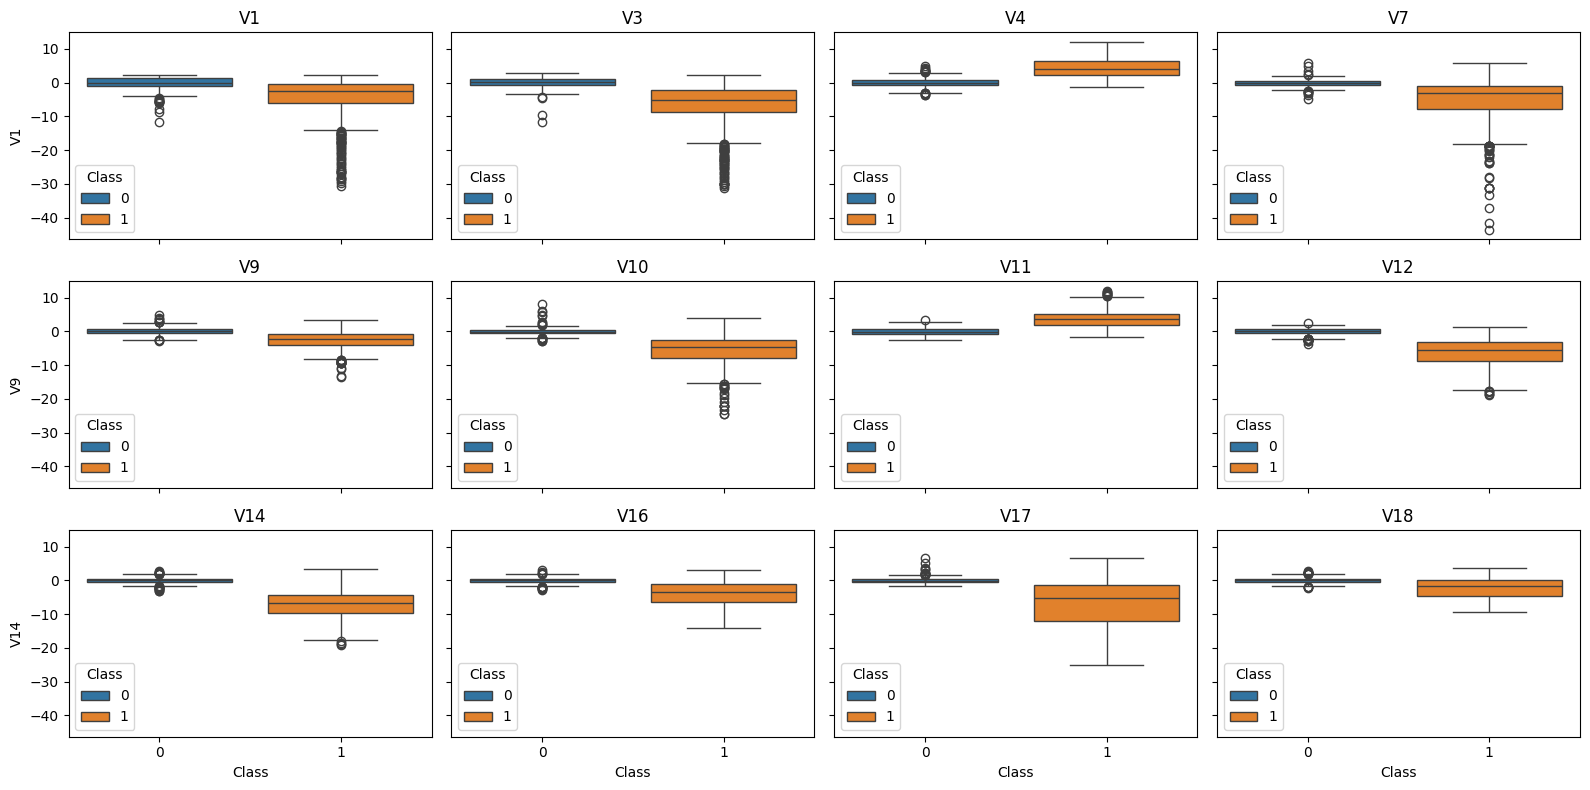

In [222]:
#@title Plot boxplot
fig_2, axes_2 = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(16, 8))
axes_2 = axes_2.flatten()
sns.boxplot(x='Class', y='V1', hue='Class', data=test_dataset, ax=axes_2[0])
axes_2[0].set_title('V1')
sns.boxplot(x='Class', y='V3', hue='Class', data=test_dataset, ax=axes_2[1])
axes_2[1].set_title('V3')
sns.boxplot(x='Class', y='V4', hue='Class', data=test_dataset, ax=axes_2[2])
axes_2[2].set_title('V4')
sns.boxplot(x='Class', y='V7', hue='Class', data=test_dataset, ax=axes_2[3])
axes_2[3].set_title('V7')
sns.boxplot(x='Class', y='V9', hue='Class', data=test_dataset, ax=axes_2[4])
axes_2[4].set_title('V9')
sns.boxplot(x='Class', y='V10', hue='Class', data=test_dataset, ax=axes_2[5])
axes_2[5].set_title('V10')
sns.boxplot(x='Class', y='V11', hue='Class', data=test_dataset, ax=axes_2[6])
axes_2[6].set_title('V11')
sns.boxplot(x='Class', y='V12', hue='Class', data=test_dataset, ax=axes_2[7])
axes_2[7].set_title('V12')
sns.boxplot(x='Class', y='V14', hue='Class', data=test_dataset, ax=axes_2[8])
axes_2[8].set_title('V14')
sns.boxplot(x='Class', y='V16', hue='Class', data=test_dataset, ax=axes_2[9])
axes_2[9].set_title('V16')
sns.boxplot(x='Class', y='V17', hue='Class', data=test_dataset, ax=axes_2[10])
axes_2[10].set_title('V17')
sns.boxplot(x='Class', y='V18', hue='Class', data=test_dataset, ax=axes_2[11])
axes_2[11].set_title('V18')
plt.tight_layout()
plt.show()

In [223]:
#@title Data describe(Fraud, Not fraud)
print('-------Normal Sample-------')
print(normal_dataset[['V1', 'V3', 'V4', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18']].sample(n=492).describe())
print('\n\n--------Fraud Sample--------')
print(fraud_dataset[['V1', 'V3', 'V4', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18']].describe())

-------Normal Sample-------
          V1     V3     V4     V7     V9    V10    V11    V12    V14    V16  \
count 492.00 492.00 492.00 492.00 492.00 492.00 492.00 492.00 492.00 492.00   
mean   -0.02   0.07   0.08  -0.06   0.09  -0.06  -0.00   0.01   0.05   0.00   
std     1.83   1.49   1.43   1.20   1.14   1.02   1.01   0.92   1.05   0.84   
min   -10.35  -8.63  -4.13 -10.47  -2.93  -5.78  -3.66  -3.13  -7.73  -4.17   
25%    -0.97  -0.81  -0.77  -0.57  -0.59  -0.55  -0.75  -0.41  -0.41  -0.42   
50%     0.02   0.22   0.10   0.02   0.04  -0.14  -0.05   0.14   0.02   0.06   
75%     1.29   1.12   0.80   0.54   0.74   0.32   0.71   0.60   0.54   0.53   
max     2.33   3.75   4.82   4.84   5.03   7.74   2.69   3.51   5.51   3.15   

         V17    V18  
count 492.00 492.00  
mean    0.04   0.07  
std     0.77   0.83  
min    -1.72  -2.72  
25%    -0.46  -0.39  
50%    -0.04   0.06  
75%     0.38   0.50  
max     5.65   3.00  


--------Fraud Sample--------
          V1     V3     V4     

In [224]:
#@title Isolation Forest model
iso_model = IsolationForest(contamination=0.1, n_estimators=100)
iso_model.fit(x_train.values)

anomaly_score_iso = iso_model.decision_function(x_test.values)

y_test = pd.DataFrame(y_test)
y_test['if_score'] = anomaly_score_iso
y_test['if_class'] = y_test['if_score'].apply(lambda x: 1 if x < 0.0 else 0)

y_test.sample(10)

,Class,if_score,if_class
88307,1,-0.13,1
15539,1,-0.24,1
7465,0,0.03,0
61528,0,0.08,0
27749,1,-0.18,1
10630,1,-0.24,1
202181,0,0.06,0
151008,1,-0.25,1
150644,1,-0.20,1
157932,0,0.06,0


              precision    recall  f1-score   support

           0       0.90      0.88      0.89       492
           1       0.89      0.90      0.89       492

    accuracy                           0.89       984
   macro avg       0.89      0.89      0.89       984
weighted avg       0.89      0.89      0.89       984



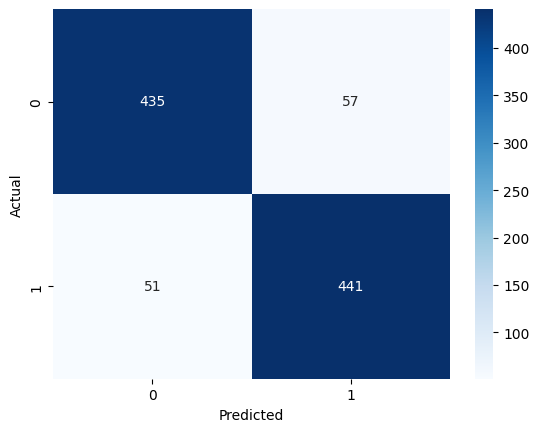

In [225]:
#@title Evaluate IF model
print(classification_report(y_test['Class'], y_test['if_class']))

cm = confusion_matrix(y_test['Class'], y_test['if_class'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [226]:
#@title SVM model
# svm_model = svm.OneClassSVM(verbose=True)
# svm_model.fit(x_test, y_test)

# svm_pred = svm_model.predict(x_train.sample(50))

# svm_pred